# Logistic Regression Classifier From Scratch

#### Importing the libraries

In [1]:
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#### Importing the Data

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [3]:
print(X.shape, y.shape)

(150, 2) (150,)


#### Sigmoid function

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

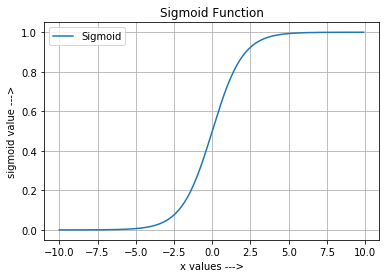

In [5]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.title('Sigmoid Function')
plt.xlabel('x values --->')
plt.ylabel('sigmoid value --->')
plt.legend(['Sigmoid'])
plt.show()

#### Plotting the Binary Data

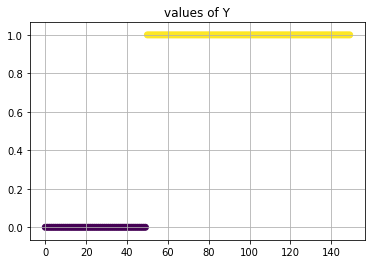

In [6]:
plt.scatter(np.arange(len(X)), y, c = y )
plt.title('values of Y');
plt.grid(True);

#### Train Test Split the Dataset

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 0)

#### Logistic Regression Class

In [8]:
class logisticReg():
     
    def __init__(self, X_train, y_train, epochs = 4000 ):
        self.iter = epochs
        self.lr = 0.01
        self.xtr = X_train
        self.ytr = y_train
        self.weights = np.zeros(self.xtr.shape[1])
        self.bias = 0
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def gradients(self, yi):
        z = yi - self.ytr
        dw = np.dot(self.xtr.T, z)/self.ytr.size
        db = np.sum(z)/self.ytr.size
        return dw, db
        
    def train(self, x_test, y_test):
        cost = []
        acc = []
        for i in range(self.iter):   
            z  = np.dot(self.xtr, self.weights) + self.bias
            yi = self.sigmoid(z)
            loss = (-self.ytr * np.log(yi) - (1 - self.ytr) * np.log(1 - yi)).mean()
            
            if i%10 == 0:
                cost.append(loss)
                yp = self.predict(x_test)
                acc.append(self.accuracy(yp, y_test))
            if i%400 == 0:
                print("Cost after Iteration {} is {:0.5f}".format(i, loss))
                
            dw, db = self.gradients(yi)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db            
        return cost, acc
            
    def predict(self, X_test):
        z = np.dot(X_test, self.weights) + self.bias
        a = self.sigmoid(z)
        y_pred = np.round(a)
        assert len(y_pred) == len(X_test)
        return np.array(y_pred)
    
    def accuracy(self, y_pred, y_test):
        return (y_pred == y_test).sum()/y_pred.size

#### Training and Testing the Model

In [9]:
model = logisticReg(X_train, y_train)

#### Accuracy before Training

In [10]:
y_pred = model.predict(X_test)
print("Model Accuracy : {:0.2f}%".format(model.accuracy(y_test, y_pred)*100))

Model Accuracy : 34.21%


#### Training the model

In [11]:
cost, acc = model.train(X_test, y_test)

Cost after Iteration 0 is 0.69315
Cost after Iteration 400 is 0.44928
Cost after Iteration 800 is 0.35391
Cost after Iteration 1200 is 0.29371
Cost after Iteration 1600 is 0.25288
Cost after Iteration 2000 is 0.22351
Cost after Iteration 2400 is 0.20141
Cost after Iteration 2800 is 0.18417
Cost after Iteration 3200 is 0.17035
Cost after Iteration 3600 is 0.15900


#### Plotting the Graph of Cost vs Iterations

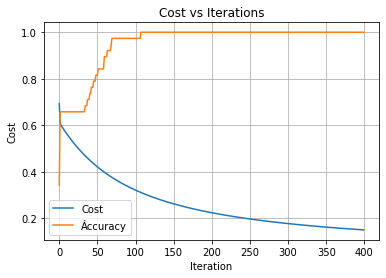

In [12]:
plt.plot(cost)
plt.plot(acc)
plt.title('Cost vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['Cost', 'Áccuracy'])
plt.grid(True)

#### Accuracy after training the model

In [13]:
y_pred = model.predict(X_test)
print("Model Accuracy : {:0.2f}%".format(model.accuracy(y_test, y_pred)*100))

Model Accuracy : 100.00%
